<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Исследование структуры данных

1). Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [133]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')


# отвечаем на контрольный вопрос
# размерность таблицы
hh_data.shape

(44744, 12)

2). Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [134]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3). Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4). Обратите внимание на информацию о числе непустых значений.

In [135]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5). Выведите основную статистическую информацию о столбцах.


In [136]:
hh_data.describe(include='object')

# отвечаем на контрольный вопрос
# кол-во уникальных значений в столбце «Опыт работы»
print(hh_data['Опыт работы'].nunique())
# самая распространенная искомая должность
print(hh_data['Ищет работу на должность:'].value_counts(ascending=False).head(1))

44413
Системный администратор    3099
Name: Ищет работу на должность:, dtype: int64


# Преобразование данных

1). Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [137]:
# выделяем образование
def get_education(arg):
    education_string = arg.split()
    education = education_string[:2]
    return (" ".join(education))


# создаем признак "Образование"
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)


# проверяем полученные категории
display(hh_data['Образование'].unique())


# отвечаем на контрольный вопрос
# кол-во соискателей со средним образованием
display(hh_data[hh_data['Образование'] == 'Среднее образование'].shape[0])

array(['Неоконченное высшее', 'Высшее образование', 'Среднее специальное',
       'Среднее образование'], dtype=object)

559

In [138]:
# удаляем признак "Образование и ВУЗ"
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

2). Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [139]:
# выделяем пол
def get_gender(arg):
    gender_age_string = arg.split()
    gender = gender_age_string[0]
    if gender == 'Мужчина':
        return 'М' 
    else:
        return 'Ж'

# выделяем возраст
def get_age(arg):
    gender_age_string = arg.split()
    age = gender_age_string[2]
    return age


# создаем признаки "Пол" и "Возраст", изменяем тип признака "Возраст" на целые числа
hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_gender)

hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
hh_data['Возраст'] = hh_data['Возраст'].astype('int64')


# отвечаем на контрольный вопрос
# процент резюме женщин
print(round(hh_data['Пол'].value_counts(normalize=True) * 100, 2))
# средний возраст соискателей
print(round(hh_data['Возраст'].mean(), 1))

М    80.93
Ж    19.07
Name: Пол, dtype: float64
32.2


In [140]:
# удаляем признак "Пол, возраст"
hh_data = hh_data.drop('Пол, возраст', axis=1)

3). Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [141]:
# выделяем опыт работы, переводим его в месяцы
def get_experience(arg):
    if (arg is np.nan) or (arg == 'Не указано'):
        return np.nan
    
    else:
        exp_string = arg.split()
        years_key = ['лет', 'год', 'года']
        months_key = ['месяц', 'месяца', 'месяцев']
        
        if (exp_string[3] in years_key) and (exp_string[5] in months_key):
            return int(exp_string[2])*12 + int(exp_string[4])
        elif exp_string[3] in months_key:
            return int(exp_string[2])
        elif (exp_string[3] in years_key) and (exp_string[5] not in months_key):
            return int(exp_string[2])*12


# создаем признак "Опыт работы (месяц)"        
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)


# отвечаем на контрольный вопрос
# медианный опыт работы (в месяцах)
print(hh_data['Опыт работы (месяц)'].median())

100.0


In [142]:
# удаляем признак "Опыт работы"
hh_data = hh_data.drop('Опыт работы', axis=1)

4). Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [143]:
# выделяем город
def get_city(arg):
    city_string = arg.split()
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    if city_string[0] == 'Москва':
        return 'Москва'
    elif city_string[0] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city_string[0] in million_cities:
        return 'Город-миллионник'
    else:
        return 'другие'
    
# выделяем готовность/неготовность к переездам
def get_moving(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

# выделяем готовность/неготовность к командировкам
def get_business_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else:
            return True
    else:
        return False    


# создаем признаки "Город", "Готовность к переезду", "Готовность к командировкам"
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_moving)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(
    get_business_trips
)


# отвечаем на контрольный вопрос
# процент соискателей из С-Пб
print(round(hh_data['Город'].value_counts(normalize=True)*100))
# процент соискателей, готовых и к переездам, и к командировкам
print(round(hh_data[
    hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']
].shape[0] / hh_data.shape[0] *100))

Москва              37.0
другие              37.0
Город-миллионник    15.0
Санкт-Петербург     11.0
Name: Город, dtype: float64
32


In [144]:
# удаляем признак "Город, переезд, командировки"
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

5). Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [145]:
# добавляем признаки желаемой занятости
hh_data['Полная занятость'] = hh_data['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_data['Частичная занятость'] = hh_data['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_data['Проектная работа'] = hh_data['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_data['Стажировка'] = hh_data['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
hh_data['Волонтерство'] = hh_data['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)

# добавляем признаки желаемого графика работы
hh_data['Полный день'] = hh_data['График'].apply(lambda x: True if 'полный день' in x else False)
hh_data['Сменный график'] = hh_data['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_data['Гибкий график'] = hh_data['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_data['Удалённая работа'] = hh_data['График'].apply(lambda x: True if 'удалённая работа' in x else False)
hh_data['Вахтовый метод'] = hh_data['График'].apply(lambda x: True if 'вахтовый метод' in x else False)


# отвечаем на контрольный вопрос
# кол-во соискателей, кот. ищут проектную работу и волонтерство
print(hh_data[
    hh_data['Проектная работа'] & hh_data['Волонтерство']
].shape[0])
# кол-во соискателей, желающих работать вахтовым методом и с гибким графиком
print(hh_data[
    hh_data['Вахтовый метод'] & hh_data['Гибкий график']
].shape[0])

436
2311


In [146]:
# удаляем признак 'Занятость', 'График'
hh_data = hh_data.drop(['Занятость', 'График'], axis=1)

6). (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [147]:
# переводим признак даты в формат datetime, достаем дату
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date


# создаем новый DF с курсами валют, переводим признак даты в формат datetime
exchange_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True).dt.date


# выделяем желаемую з/п
def get_salary(arg):
    salary = arg.split()[0]
    return int(salary)

# выделяем наименование валюты
def get_currency(arg):
    currency = arg.split()[1].replace('.', '')
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    if currency == 'руб':
        return 'RUB'
    else:
        return currency_dict[currency]


# создаем временные признаки "Зарплата" и "Валюта"
hh_data['Зарплата'] = hh_data['ЗП'].apply(get_salary)
hh_data['Валюта'] = hh_data['ЗП'].apply(get_currency)


# объединяем таблицы
merged_data = hh_data.merge(
    exchange_rates,
    left_on=['Обновление резюме', 'Валюта'],
    right_on=['date', 'currency'],
    how='left'
)


# заполняем пропуски
merged_data = merged_data.fillna({'close': 1, 'proportion':1})


# создаем признак "ЗП (руб)"
merged_data['ЗП (руб)'] = merged_data['Зарплата'] * merged_data['close'] / merged_data['proportion']


# отвечаем на контрольный вопрос
# желаемая медианная заработная плата соискателей
print(round(merged_data['ЗП (руб)'].median() / 1000, 0))

59.0


In [148]:
# удаляем признак "ЗП" и временные признаки "Зарплата" и "Валюта"
merged_data = merged_data.drop(['ЗП', 'Зарплата', 'Валюта'], axis=1)

# Исследование зависимостей в данных

1). Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

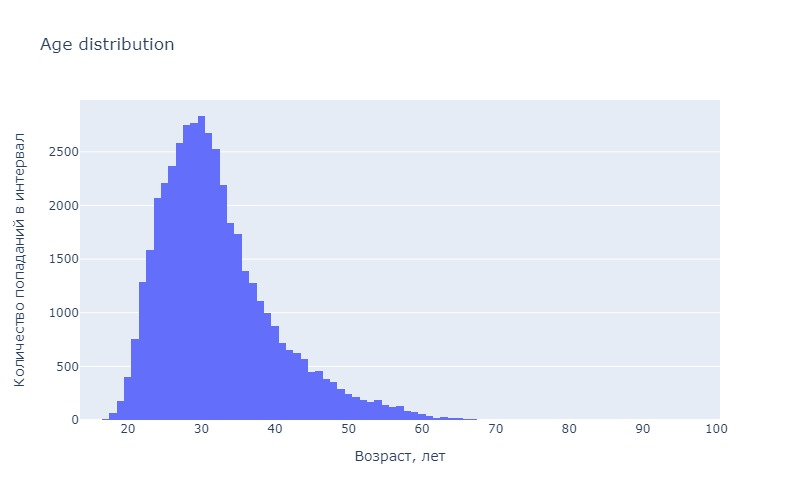

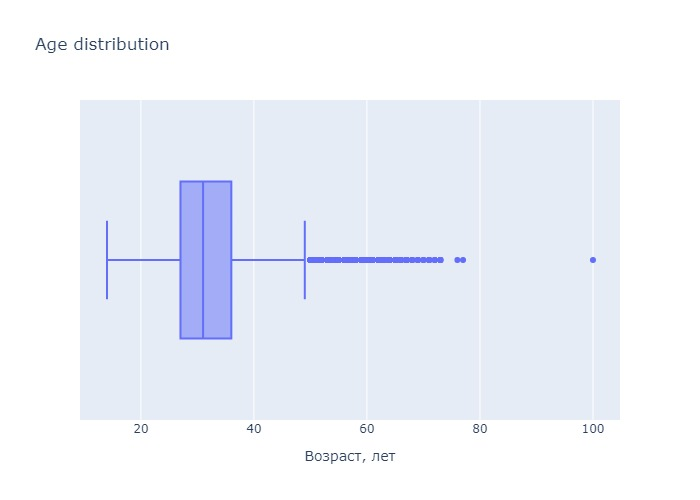

In [149]:
# строим гистограмму распределения возраста
histplot_age = px.histogram(
    merged_data,
    x='Возраст',
    height=500,
    width=800,
    title='Age distribution'
)

histplot_age.update_layout(
    xaxis_title='Возраст, лет',
    yaxis_title='Количество попаданий в интервал'
)

histplot_age.show("jpg")
histplot_age.write_image("histogram1.jpg")

# строим коробчатую диаграмму распределения возраста
boxplot_age = px.box(
    merged_data,
    x='Возраст',
    orientation='h',
    title="Age distribution"
)

boxplot_age.update_layout(
    xaxis_title='Возраст, лет'
)

boxplot_age.show("jpg")
boxplot_age.write_image("box1.jpg")

In [150]:
# отвечаем на контрольный вопрос
# модальное значение возраста соискателей
merged_data['Возраст'].mode()[0]

30

1. Мода распределения согласно гистограмме - 30 лет (у 2834 соискателей).
2. Предельные значения: минимальное - 14 лет (1 соискатель), максимальное - 100 лет (1 соискатель). Стоит отметить, что максимальное значение возраста явно относится к потенциальным выбросам. В этой связи максимальный возраст соискателей - 70 лет (у 3 человек), хотя данная величина на коробчатой диаграмме относится к числу аномалий. В этой связи, с учетом данных 2 графиков реальный максимальный возраст стоит считать 50 лет.    
Возраст большинства соискателей приходится на интервал 24 - 33 года. Указанный интервал я определила согласно гистограмме, т.к. именно на эти значения приходится максимальное число попаданий: 2074 ед. для 24 лет и 2187 ед. для 33 лет, в меньшую и большую стороны при этом наблюдается резкий спад количества попаданий: около 500 влево и около 350 вправо.    
Согласно коробчатой диаграмме данный показатель находится в интервале 27 - 36 лет, соответственно, 25 % и 75 % квантили.    
Т.о. данные коробчатой диаграммы не противоречат данным гистограммы в части верхней границы возраста большинства соискателей ( 33 года (гистограмма) входит в интервал до 36 лет (коробчатая диаграмма)).
3. К аномалиям я однозначно отнесла возраст 76 - 77 и 100 лет (согласно гистограмме).    
При этом коробчатая диаграмма к числу аномалий относит возраст свыше 50 лет, хотя на интервал 51 - 72 года приходится порядка 1500 попаданий: по 100 - 200 попаданий приходится для каждой возрастной отметки в интервале 51 - 57 лет, 20 ед. для 65 лет.     
Т.о. к аномалиям можно отнести возраст свыше 65 лет (по 10 и менее попаданий).

2). Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

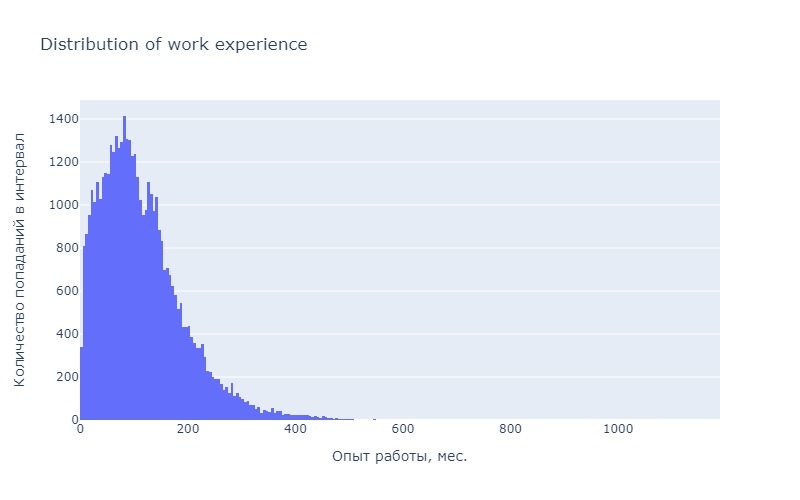

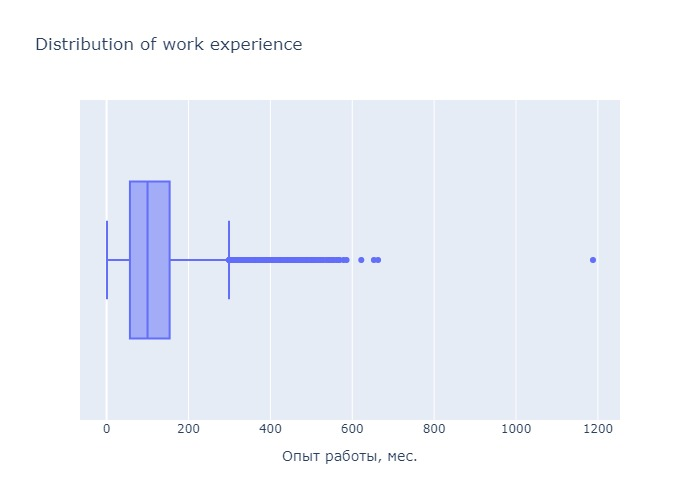

In [151]:
# строим гистограмму распределения опыта работы
histplot_exp = px.histogram(
    merged_data,
    x='Опыт работы (месяц)',
    height=500,
    width=800,
    title='Distribution of work experience'
)

histplot_exp.update_layout(
    xaxis_title='Опыт работы, мес.',
    yaxis_title='Количество попаданий в интервал'
)

histplot_exp.show("jpg")
histplot_exp.write_image("histogram2.jpg")


# строим коробчатую диаграмму распределения опыта работы
boxplot_exp = px.box(
    merged_data,
    x='Опыт работы (месяц)',
    orientation='h',
    title="Distribution of work experience"
)

boxplot_exp.update_layout(
    xaxis_title='Опыт работы, мес.'
)

boxplot_exp.show("jpg")
boxplot_exp.write_image("box2.jpg")

In [152]:
# отвечаем на контрольный вопрос
# максимальный опыт работы (в месяцах)
merged_data['Опыт работы (месяц)'].max()

1188.0

1. Мода распределения - 80-84 мес. (1414 попаданий).
2. Предельные значения: минимальное - 0 - 4 мес. (340 попаданий), максимальное - 1188 мес., что однозначно выброс. По данным 2 графиков максимальное значение опыта - 299 мес.    
Опыт работы большинства соискателей, по моему мнению, находится в интервале от 40 - 44 мес. (1128 попаданий) до 140 - 144 мес. (1035 попаданий), т.к. влево наблюдается значительный спад числа попаданий (100 ед.), сопровождающийся "пеньками", вправо спад составляет порядка 150 ед.
3. Аномалии: опыт свыше 469 мес., о чем свидетельсвуют данные гистограммы (10 попаданий в интервал 465 - 469 мес., потом спад до 5-6 попаданий в среднем для 4-месячного интервала) и здравый смысл.

3). Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


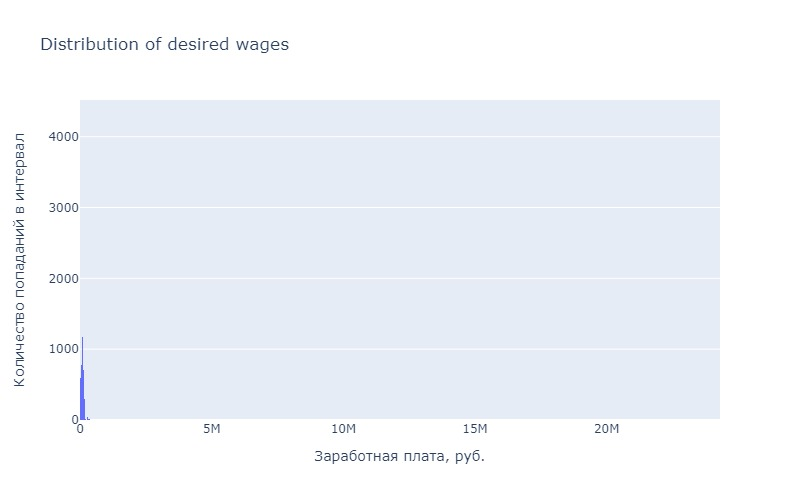

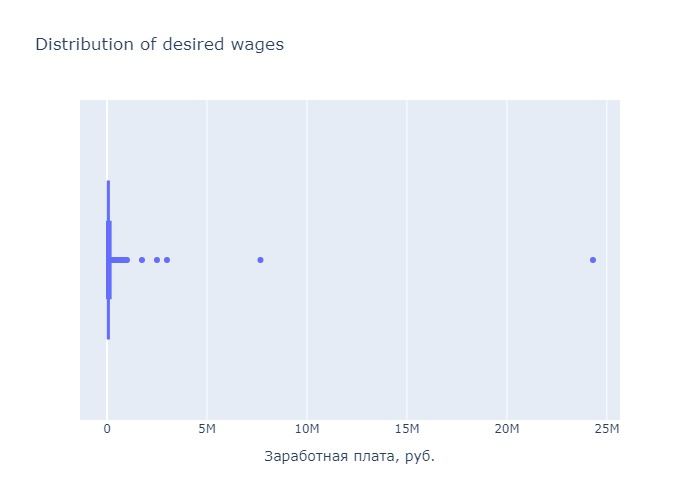

In [153]:
# строим гистограмму распределения з/п
histplot_salary = px.histogram(
    merged_data,
    x='ЗП (руб)',
    height=500,
    width=800,
    title='Distribution of desired wages'
)

histplot_salary.update_layout(
    xaxis_title='Заработная плата, руб.',
    yaxis_title='Количество попаданий в интервал'
)

histplot_salary.show("jpg")
histplot_salary.write_image("histogram3.jpg")


# строим коробчатую диаграмму распределения з/п
boxplot_salary = px.box(
    merged_data,
    x='ЗП (руб)',
    orientation='h',
    title="Distribution of desired wages"
)

boxplot_salary.update_layout(
    xaxis_title='Заработная плата, руб.'
)

boxplot_salary.show("jpg")
boxplot_salary.write_image("box3.jpg")

In [154]:
# отвечаем на контрольный вопрос
# кол-во соискателей, требующих з/п > 1 млн руб.
merged_data[merged_data['ЗП (руб)'] > 1000000].shape[0]

5

1. Мода распределения равна 50 тыс. руб. Данная величина определена с помощью кода, т.к. найти модальное значение на графиках не представляется возможным.
2. Предельные значения: минимальное - 1 руб., максимальное - 24.3 млн руб.    
Желаемую з/п большинства определим согласно коробчатой диаграмме, т.к. на гистограмме это сделать не представляется возможным (даже если задать количество корзин вручную). Данный показатель находится в интервале 37 - 95 тыс. руб. (соответственно, 25 % и 75 % квантили).
3. К аномалиям, на мой взгляд, относится все, что ниже интервала 17.5 - 22.49 тыс. руб. (на гистограмме 1502 попадания) и выше отметки ~250 тыс. руб. (480 попаданий). Данный интервал для выбора аномалий определен по данным гистограммы и здравого смысла. При это коробчатая диаграмма к числу аномалий относит данные свыше 180.9 тыс. руб. Мне эта величина заниженной, учитывая реальные желания соискателей из Мск и С-Пб.

4). Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

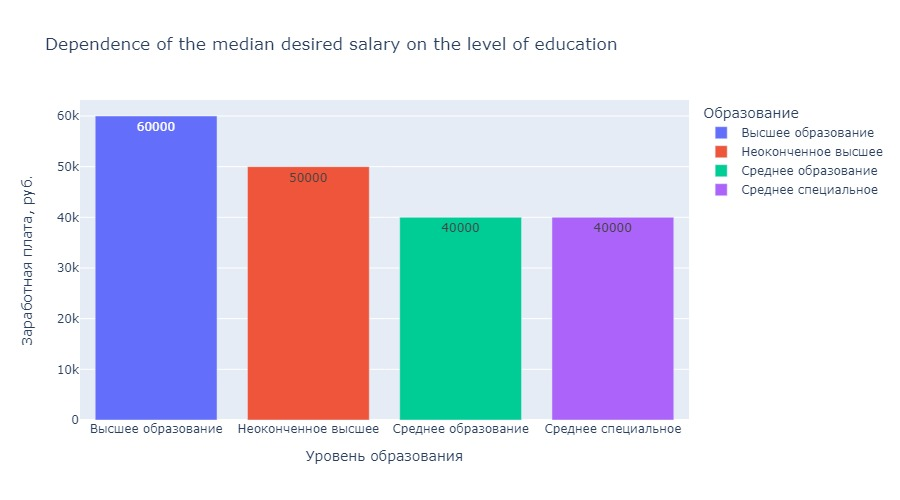

In [155]:
# выделяем резюме, в которых желаемая з/п меньше 1 млн руб.
mask = merged_data['ЗП (руб)'] < 1000000


# считаем медианную з/п для каждого уровня образования
bar_data_salary = merged_data[mask].groupby(
    by='Образование',
    as_index=False
)['ЗП (руб)'].median()


# строим столбчатую диаграмму зависимости медианной желаемой з/п от уровня образования
barplot_salary = px.bar(
    bar_data_salary, 
    x='Образование',
    y='ЗП (руб)', 
    color='Образование', 
    text ='ЗП (руб)', 
    orientation='v', 
    height=500, 
    width=900, 
    title='Dependence of the median desired salary on the level of education' 
)

barplot_salary.update_layout(
    xaxis_title='Уровень образования',
    yaxis_title='Заработная плата, руб.'
)

barplot_salary.show("jpg")
barplot_salary.write_image("bar4.jpg")

In [156]:
# отвечаем на контрольный вопрос
# категория образования, оплачиваемая выше всех по медианному показателю
bar_data_salary.sort_values(by='ЗП (руб)', ascending=False).head(1)

,Образование,ЗП (руб)
0,Высшее образование,60000.0


1. Максимальный уровень желаемой з/п отмечается для высшего образования, минимальный - для среднего и среднего специального образования.
2. Признак образования в некоторой степени важен при прогнозировании з/п, т.к. для соискателей с высшим образованием однозначно характерен больший уровень желаемой з/п, для соискателей с неоконченным высшим - средний уровень желаемой з/п и т.д.

5). Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

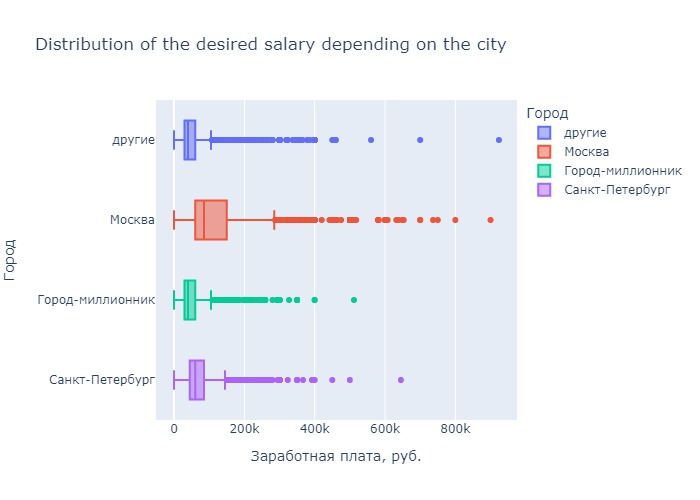

In [157]:
# строим коробчатую диаграмму распределения желаемой з/п в зависимости от города
boxplot_salary = px.box(
    merged_data[mask],
    x='ЗП (руб)',
    y='Город',
    color='Город',
    orientation='h',
    title="Distribution of the desired salary depending on the city"
)

boxplot_salary.update_layout(
    xaxis_title='Заработная плата, руб.',
    yaxis_title='Город'
)

boxplot_salary.show("jpg")
boxplot_salary.write_image("box5.jpg")

In [158]:
# отвечаем на контрольный вопрос
# город (категория городов), в кот. зафиксирован наибольший показатель желаемой заработной платы
merged_data[mask].sort_values(
    by='ЗП (руб)',
    ascending=False
).loc[0, 'Город']

'другие'

1. Для городов-миллионников и городов категории "другие" соотношение медианной желаемой з/п и их размаха одинаково и в целом границы размаха не противоречат и не сильно отличаются от медианы (10 и 20 тыс. руб. в левую и правую стороны, соответственно).    
Для С-Пб данная разница между медианной желаемой з/п и верхней границы размаха более значительна: 25 тыс. руб., по нижней границе разница не так велика: порядка 15 тыс. руб.    
Для Мск ожидаемо уровень медианной желаемой з/п не отражает границы межквартильного размаха: 25 и 65 тыс. руб. в левую и правую стороны, соответственно.
2. Признак города несомненно влияет на величину желаемой з/п - для Мск и С-Пб данный показатель заметно выше (даже по нижней границе размаха: 60 и 40 тыс. руб., соответственно, против 30 тыс. руб. для городов-миллионников и городов категории "другие"). Верхняя граница желаемого заработка еще ярче отражает город, в котором проживает соискатель, - для Мск этот показатель значительно отличается от других городов: 150 тыс. руб. против 85 тыс. руб. для С-Пб и 60 тыс. руб. для остальных категорий городов.

6). Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

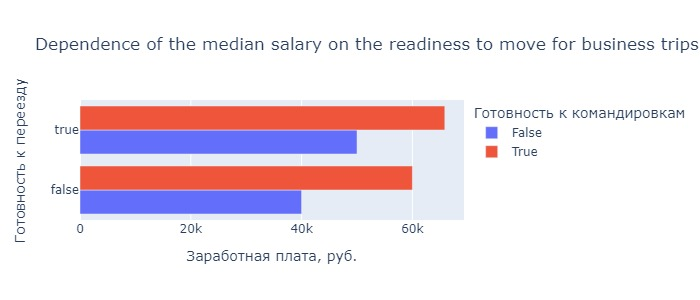

In [159]:
# считаем медианную з/п для признаков готовности к переезду и к командировкам
bar_data_salary_2 = merged_data.groupby(
    by=['Готовность к переезду', 'Готовность к командировкам'],
    as_index=False
)['ЗП (руб)'].median()


# строим столбчатую диаграмму зависимости медианной з/п от готовности соискателей к переезду к командировкам
barplot_salary_2 = px.bar(
    bar_data_salary_2,
    x='ЗП (руб)',
    y='Готовность к переезду',
    color='Готовность к командировкам',
    barmode='group',
    height=300,
    width=700,
    title='Dependence of the median salary on the readiness to move for business trips'
)

barplot_salary_2.update_layout(
    xaxis_title='Заработная плата, руб.',
    yaxis_title='Готовность к переезду'
)

barplot_salary_2.show("jpg")
barplot_salary_2.write_image("bar6.jpg")

In [160]:
# отвечаем на контрольный вопрос 
# желаемая медианная з/п соискателей, готовых и к переезду, и к командировкам
mask1 = merged_data['Готовность к переезду']
mask2 = merged_data['Готовность к командировкам']

round(merged_data[mask1 & mask2]['ЗП (руб)'].median() / 1000)

66

Максимальный уровень медианной желаемой з/п характерен для категории соискателей, готовых к переезду и командровкам - порядка 66 тыс. руб.    
Следующий по величине уровень желаемой з/п - лоя категории  соискателей, готовых к командировкам, но не готовых к переезду, - 60 тыс. руб.    
Минимальный уровень з/п просят соискатели, не готовые ни к переезду, ни к командировкам - 40 тыс. руб.

7). Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

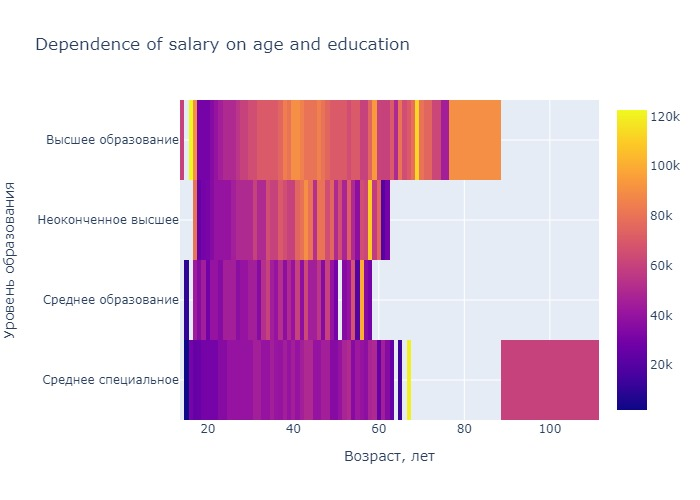

In [161]:
# считаем медианную з/п для признаков возраста и образования
pivot_salary = merged_data.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
)


# строим тепловую карту зависимости медианной з/п от возраста и образования
heatmap_salary = px.imshow(pivot_salary, title='Dependence of salary on age and education')

heatmap_salary.update_layout(
    xaxis_title='Возраст, лет',
    yaxis_title='Уровень образования'
)

heatmap_salary.show("jpg")
heatmap_salary.write_image("imshow7.jpg")

Для соискателей с высшим образованием наблюдается самый интенсивный карьерный рост с максимальной желаемой з/п 112.5 тыс. руб. по достижении 69 лет. Затем наблюдается плавный спад до уровня з/п 45 тыс. руб. в возрасте 76 лет. Стоит отметить, что з/п на уровне 90 тыс. руб. в возрасте 77 лет очень похоже на аномальное значение, поэтому эту величину я не анализирую.     
Для соискателей с неоконченным высшим образованием характерен довольно быстрый карьерный рост: максимальная желаемая з/п 110 тыс. руб. по достижении 58 лет, после чего наблюдается резкий спад з/п: 30 тыс. руб. в 62 года.    
Для соискателей со средним образованием и средним специальным образованием картина практически схожая: медленный карьерный рост, максимальная з/п 100 и 120 тыс. руб., соответственно. При этом, в группе среднего специального наблюдается вброс для соискателей старше 90 лет.

8). Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

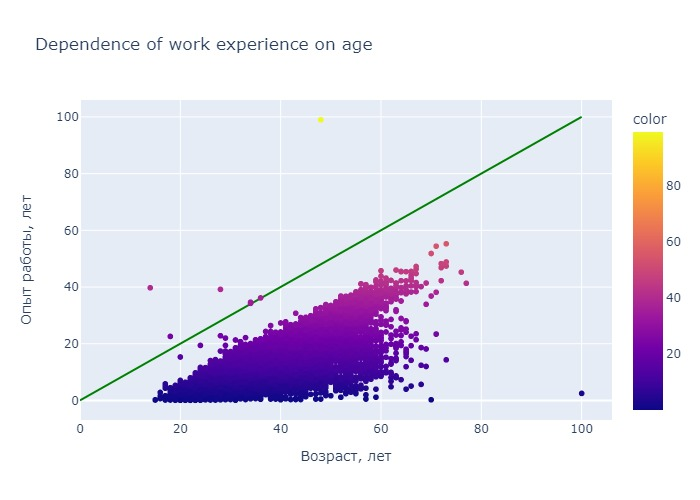

In [162]:
# переводим опыт работы в годы
experience_year = merged_data['Опыт работы (месяц)'] / 12

# строим диаграмму рассеяния зависимости опыта работы от возраста
scatter_exp_age = px.scatter(
    merged_data,
    x='Возраст',
    y=experience_year, 
    color=experience_year, 
    width=700,
    height=500,
    title="Dependence of work experience on age"
)

# добавляем прямую, проходящую через точки (0, 0) и (100, 100) 
reference_line = go.Scatter(x=[0, 100],
                            y=[0, 100],
                            mode="lines",
                            line=go.scatter.Line(color="green"),
                            showlegend=False)

scatter_exp_age.add_trace(reference_line)

scatter_exp_age.update_layout(
    xaxis_title='Возраст, лет',
    yaxis_title='Опыт работы, лет'
)

scatter_exp_age.show("jpg")
scatter_exp_age.write_image("scatter8.jpg")

In [163]:
# отвечаем на контрольный вопрос
# сколько точек лежат строго выше построенной прямой
mask3 = merged_data['Опыт работы (месяц)'] / 12 >= merged_data['Возраст']
merged_data[mask3].shape[0]

7

В целом, подавляющее большинство значений опыта работы и соответствующих им значений возраста не противоречат лруг другу - опыт работы меньше возраста.    
При этом наблюдается 7 отклонений, когда опыт работы равен возрасту.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


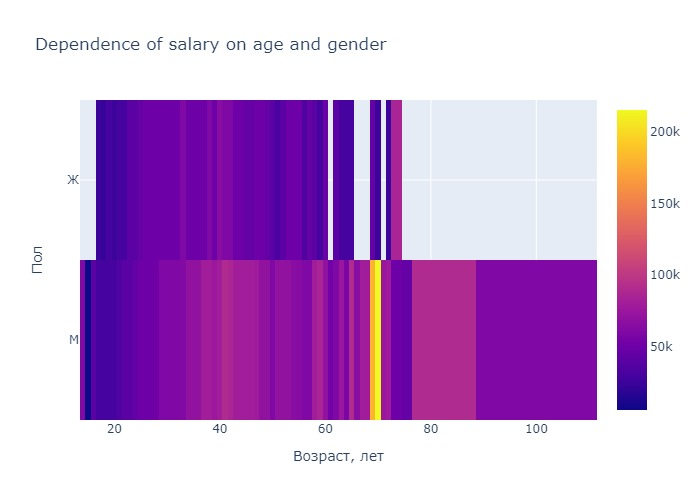

In [164]:
# считаем медианную з/п для признаков возраста и пола
pivot_salary_2 = merged_data.pivot_table(
    values='ЗП (руб)',
    index='Пол',
    columns='Возраст',
    aggfunc='median'
)


# строим тепловую карту зависимости медианной з/п от возраста и пола
heatmap_salary_2 = px.imshow(pivot_salary_2, title='Dependence of salary on age and gender')

heatmap_salary_2.update_layout(
    xaxis_title='Возраст, лет',
    yaxis_title='Пол'
)

heatmap_salary_2.show("jpg")
heatmap_salary_2.write_image("imshow9.jpg")

Согласно графика соискательницы требуют в целом меньший уровень з/п. Максимальное значение - 65 тыс. руб., возраст - 45 лет. Преобладают значения в интервале 45 - 50 тыс. руб. вне зависимости от возраста (от 25 ло 55 лет).    
Стоит отметить, что з/п на уровне 85 тыс. руб. для возраста 73 года в расчет не берем, т.к. это аномалия.  
Для мужчин картина несколько иная: чем больше возраст (и, соответственно, опыт работы), тем выше требуемая з/п. Преобладают значения 80 - 90 тыс. руб. для возрастной категории 37-47 лет, и около 60 лет, но для данной возрастной категории наблюдается разброс желаемой з/п от 52.5 тыс. руб. до 80 тыс. руб.    
Максимальная требуемая з/п отмечается на уровне 215 тыс. руб., но также как и з/п 180 тыс. руб., думаю, это аномальные значения, т.к. возраст при этом указан на уровне 70 и 69 лет, соответственно. У мужчин также отмечается значительное число выбросов: я бы однозначно в эту категорию отнесла з/п для мужчин возраста свыше 70 лет. 


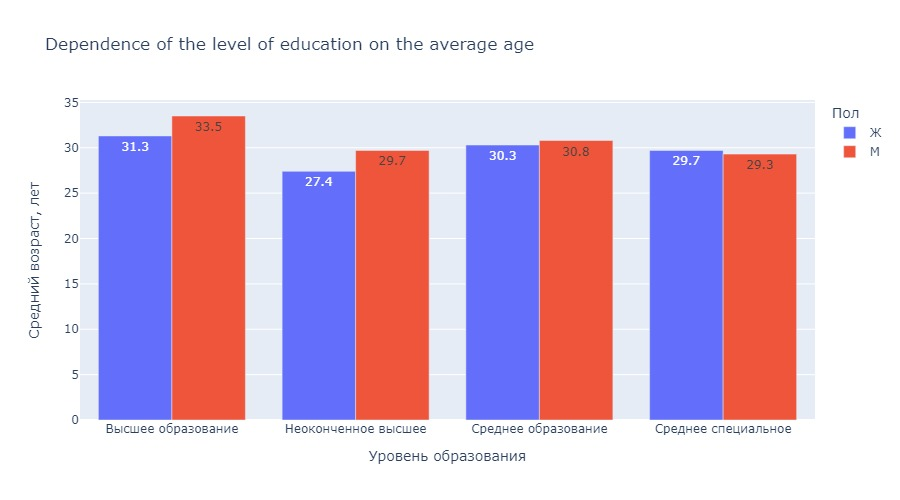

In [165]:
# считаем средний возраст для признаков уровня образования и пола соискателей 
bar_data_age = merged_data.groupby(
    by=['Образование', 'Пол'],
    as_index=False
)['Возраст'].mean().round(1)

# строим коробчатую диаграмму зависимости уровня образования от среднего возраста соискателей с учетом пола
barplot_age = px.bar(
    bar_data_age, 
    x='Образование',
    y='Возраст', 
    color='Пол', 
    barmode='group',
    text ='Возраст', 
    orientation='v', 
    height=500, 
    width=900, 
    title='Dependence of the level of education on the average age' 
)

barplot_age.update_layout(
    xaxis_title='Уровень образования',
    yaxis_title='Средний возраст, лет'
)

barplot_age.show("jpg")
barplot_age.write_image("bar10.jpg")

Наличие высшего образования в основном присуще соискателям более старшего возраста (при оценке по среднему показателю): 31.3 года для женщин, 33.5 - для мужчин.    
Также для категории свыше 30 лет (по средней оценке) характерно наличие среднего уровня образования.    
Соискатели младше 30 лет (по средней оценке) имеют неоконченное высшее и среднее специальное образование (вне зависимости от пола).    
При этом минимальный средний возраст отмечается для соискателей женского пола, имеющих неоконченное высшее образование, максимальный - для мужчин с высшим образованием.

# Очистка данных

1). Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [166]:
# отвечаем на контрольный вопрос
# количество дубликатов
duplicates = merged_data[merged_data.duplicated()]
print(duplicates.shape[0])


# удаляем дубликаты
merged_data = merged_data.drop_duplicates()

161


2). Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [167]:
merged_data.isnull().sum() 

Ищет работу на должность:              0
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Обновление резюме                      0
Авто                                   0
Образование                            0
Пол                                    0
Возраст                                0
Опыт работы (месяц)                  168
Город                                  0
Готовность к переезду                  0
Готовность к командировкам             0
Полная занятость                       0
Частичная занятость                    0
Проектная работа                       0
Стажировка                             0
Волонтерство                           0
Полный день                            0
Сменный график                         0
Гибкий график                          0
Удалённая работа                       0
Вахтовый метод                         0
currency                           42312
per                                42312
date            

In [168]:
# отвечаем на контрольный вопрос
# кол-во пропусков в столбце «Опыт работы (месяц)»
merged_data['Опыт работы (месяц)'].isnull().sum() 

168

3). Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [169]:
# удаляем строки с пропусками в столбцах с местом работы и должностью
merged_data = merged_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])


# заменяем пропуски с столбце с опытом работы на медианное значение
merged_data = merged_data.fillna({'Опыт работы (месяц)': merged_data['Опыт работы (месяц)'].median()})


# отвечаем на контрольный вопрос
# результирующее среднее значение в столбце «Опыт работы (месяц)»
round(merged_data['Опыт работы (месяц)'].mean())

114

4). Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [170]:
# фильтруем данные
mask4 = merged_data['ЗП (руб)'] > 1000000
mask5 = merged_data['ЗП (руб)'] < 1000
outliers = merged_data[mask4 | mask5]


# отвечаем на контрольный вопрос
# кол-во выбросов
outliers.shape[0]

89

In [171]:
# удаляем записи
merged_data = merged_data.drop(outliers.index, axis=0)

5). В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [172]:
# фильтруем данные (выше, при построении графиков)
mask3 = merged_data['Опыт работы (месяц)'] / 12 >= merged_data['Возраст']
outliers_2 = merged_data[mask3]


# отвечаем на контрольный вопрос
# кол-во выбросов
outliers_2.shape[0]

7

In [173]:
# удаляем записи
merged_data = merged_data.drop(outliers_2.index, axis=0)

6). В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

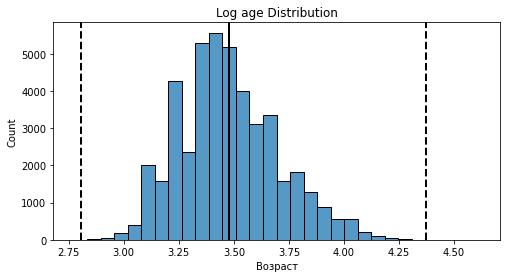

In [174]:
# отображаем возраст в логарифмическом масштабе
log_age = np.log(merged_data['Возраст'] + 1)

# строим гистограмму распределения возраста в логарифмическом масштабе
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
histplot_log_age = sns.histplot(log_age, bins=30, ax=ax)
histplot_log_age.axvline(log_age.mean(), color='k', lw=2)
histplot_log_age.axvline(log_age.mean() + 4 * log_age.std(), color='k', ls='--', lw=2)
histplot_log_age.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2)
histplot_log_age.set_title('Log age Distribution');

Распределение ассиметрично в правую сторону.

In [175]:
# определяем выбросы
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


outliers_3, data = outliers_z_score_mod(merged_data, 'Возраст', left=3,  right=4, log_scale=True)


# отвечаем на контрольный вопрос
# кол-во выбросов по методу z-отклонений
print(outliers_3.shape[0])

3


In [176]:
display(outliers_3)

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Удалённая работа,Вахтовый метод,currency,per,date,time,close,vol,proportion,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее образование,М,15,2.0,Санкт-Петербург,...,False,False,NaN,NaN,NaN,NaN,1.0,NaN,1.0,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,False,False,NaN,NaN,NaN,NaN,1.0,NaN,1.0,60000.0


В категорию выбросов попали соискатели с возрастом 15 и 100 лет.